# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [88]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import numpy as np 
import pandas as pd

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

import requests  
from io import BytesIO  

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [89]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

#url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"
url_LondonHousePrices= BytesIO(requests.get("https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls").content)
# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [90]:
print("Quick view: \n", properties.head())
print("\nLook at shape: \n", properties.shape)
print("\nColumn names: \n", properties.columns)

Quick view: 
   Unnamed: 0 City of London Barking & Dagenham     Barnet     Bexley  \
0        NaT      E09000001          E09000002  E09000003  E09000004   
1 1995-01-01          90347              51870      98948      64956   
2 1995-02-01          81213              52513      98848      64786   
3 1995-03-01          78168              52701      97848      64366   
4 1995-04-01          76172              54618      96273      64276   

       Brent    Bromley     Camden    Croydon     Ealing  ... NORTH WEST  \
0  E09000005  E09000006  E09000007  E09000008  E09000009  ...  E12000002   
1      76880      83082     119775      70118      85469  ...      40907   
2      77651      83068     118365      69908      86551  ...      40877   
3      77644      82856     119131      69666      87067  ...      41351   
4      78668      82525     118948      69562      87933  ...      41195   

  YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS EAST OF ENGLAND     LONDON  \
0          E12000

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [ ]:
properties=properties.drop(0) #drop first row (don't need those codes)
properties=properties.iloc[:,0:34] #grab only the london boroughs data - the rest are not london boroughs
properties=properties.transpose() #transpose the data: columns are dates, rows are boroughs
print(properties.head())

                                    1                    2    \
Unnamed: 0          1995-01-01 00:00:00  1995-02-01 00:00:00   
City of London                    90347                81213   
Barking & Dagenham                51870                52513   
Barnet                            98948                98848   
Bexley                            64956                64786   

                                    3                    4    \
Unnamed: 0          1995-03-01 00:00:00  1995-04-01 00:00:00   
City of London                    78168                76172   
Barking & Dagenham                52701                54618   
Barnet                            97848                96273   
Bexley                            64366                64276   

                                    5                    6    \
Unnamed: 0          1995-05-01 00:00:00  1995-06-01 00:00:00   
City of London                    83392                93757   
Barking & Dagenham                5452

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [92]:
properties.columns=properties.iloc[0] #Set first row as columns
properties=properties.drop(properties.index[0]) #Now drop first row since it's the dates
properties=properties.drop(columns=['Unnamed: 0'],errors='ignore') #had to add this
properties.reset_index(inplace=True) #reset index so that London_Borough is a column
properties.rename(columns={properties.columns[0]: 'London_Borough'}, inplace=True) #Make first column name 'London_Borough'
print(properties.head())
#now we have the boroughs as the first column, and the dates as the remaining columns

Unnamed: 0      London_Borough 1995-01-01 00:00:00 1995-02-01 00:00:00  \
0               City of London               90347               81213   
1           Barking & Dagenham               51870               52513   
2                       Barnet               98948               98848   
3                       Bexley               64956               64786   
4                        Brent               76880               77651   

Unnamed: 0 1995-03-01 00:00:00 1995-04-01 00:00:00 1995-05-01 00:00:00  \
0                        78168               76172               83392   
1                        52701               54618               54524   
2                        97848               96273               95737   
3                        64366               64276               63995   
4                        77644               78668               79464   

Unnamed: 0 1995-06-01 00:00:00 1995-07-01 00:00:00 1995-08-01 00:00:00  \
0                        93757      

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [93]:
properties_melted=properties.melt(id_vars=['London_Borough'],var_name='Date',value_name='Avg. Price') #melt
print(properties_melted.head(35)) #visualize to double check

          London_Borough       Date Avg. Price
0         City of London 1995-01-01      90347
1     Barking & Dagenham 1995-01-01      51870
2                 Barnet 1995-01-01      98948
3                 Bexley 1995-01-01      64956
4                  Brent 1995-01-01      76880
5                Bromley 1995-01-01      83082
6                 Camden 1995-01-01     119775
7                Croydon 1995-01-01      70118
8                 Ealing 1995-01-01      85469
9                Enfield 1995-01-01      77018
10             Greenwich 1995-01-01      65784
11               Hackney 1995-01-01      63375
12  Hammersmith & Fulham 1995-01-01     129363
13              Haringey 1995-01-01      81997
14                Harrow 1995-01-01      86737
15              Havering 1995-01-01      68980
16            Hillingdon 1995-01-01      75819
17              Hounslow 1995-01-01      82041
18             Islington 1995-01-01      92577
19  Kensington & Chelsea 1995-01-01     197675
20  Kingston 

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [94]:
print(properties_melted.dtypes) #see that Avg. Price is "object"
properties_melted['Avg. Price'] = pd.to_numeric(properties_melted['Avg. Price'].astype(float))
print(properties_melted.dtypes) #check again and see that it's now float

London_Borough            object
Date              datetime64[ns]
Avg. Price                object
dtype: object
London_Borough            object
Date              datetime64[ns]
Avg. Price               float64
dtype: object


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [99]:
print(properties_melted.count()) #confirm we have the same number of entries in each column
print(properties_melted['London_Borough'].nunique()) #check the number of unique borough names
#We see that we have 33 boroughs, which is counting "City of London" separately, so we have 32 boroughs as required
print(properties_melted['London_Borough'].isnull().sum()) #confirm there are no null values (we already subsetted the dataframe)

London_Borough    11913
Date              11913
Avg. Price        11913
dtype: int64
33
0


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

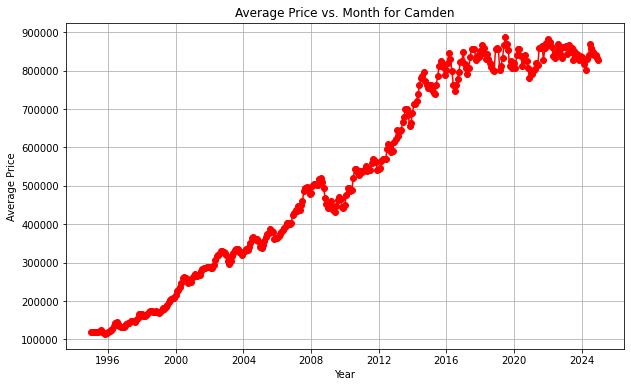

In [102]:
camden_data=properties_melted[properties_melted['London_Borough']=='Camden']
plt.figure(figsize=(10,6))
plt.plot(camden_data['Date'],camden_data['Avg. Price'],marker='o',color='red')
plt.title('Average Price vs. Month for Camden')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

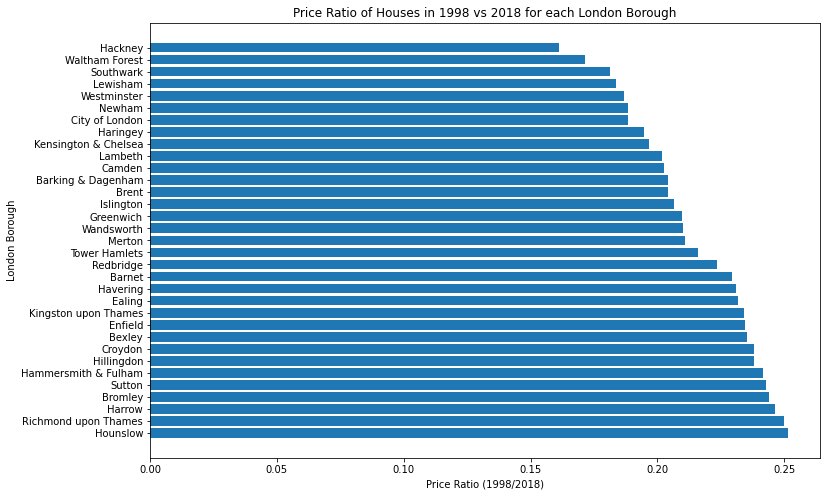

Borough with the Greatest House Price Increase: Hackney
Price Ratio (1998 / 2018): 0.16133368258111871


In [104]:
def price_ratio(data): 
    price_98=data[data['Date'].dt.year==1998]['Avg. Price'].mean()
    price_18=data[data['Date'].dt.year==2018]['Avg. Price'].mean()
    
    if price_98 is not None and price_18 is not None:
        return price_98/price_18
    else: 
        return None

ratios={}

for borough in properties_melted['London_Borough'].unique():
    data=properties_melted[properties_melted['London_Borough']==borough]
    ratio=price_ratio(data)
    ratios[borough]=ratio
    
ratios_df=pd.DataFrame(list(ratios.items()),columns=['London_Borough','Price Ratio'])
ratios_df=ratios_df.sort_values(by='Price Ratio',ascending=False)

plt.figure(figsize=(12,8))
plt.barh(ratios_df['London_Borough'],ratios_df['Price Ratio'])

plt.xlabel('Price Ratio (1998/2018)')
plt.ylabel('London Borough')
plt.title('Price Ratio of Houses in 1998 vs 2018 for each London Borough')

plt.show()

min_ratio=ratios_df.loc[ratios_df['Price Ratio'].idxmin()] #minimum ratio means the greatest increase
print(f"Borough with the Greatest House Price Increase: {min_ratio['London_Borough']}")
print(f"Price Ratio (1998 / 2018): {min_ratio['Price Ratio']}")

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

From our analysis, we determined that the London borough which has seen the greatest average house price increase from 1998 to 2018 is HACKNEY. We also determined that every London borough has seen a drastic increase in these average prices, as all of the ratios of the prices from 1998/2018 are below 1 (and nearly all are below 0.25 even).

The first step in our analysis was to visualize the data. We did this by showing a snippet of the information contained in the dataframe. We then needed to filter out unnecessary data. We removed the ID row, and all columns which were not associated with one of the 32 (33 if you include "City of London") boroughs. We then transposed the data, such that the first column contained the respective borough names, and all other column contained the average values for each month. We then "melted" the data, so that we have three well-defined columns: Borough, Date, Average Price. Finally, we checked for null values, ensured that our data types were consistent with the upcoming analysis method, and verified that each column has the same number of entries. Finally, we defined a function to determine the ratio of the average (of averages) price for each month, for each borough. Utilizing our function, we inserted the ratios in a dictionary, which we then turned into a dataframe for ease of handling. We finally created a bar plot of our ratio data, to visualize the results. The bar plot, along with our method for searching for the minimum ratio value, showed that Hackney was the "winner", i.e the London borough with the smallest ratio of 1998-Price/2018-Price, or the largest average increase since 1998. 